In [1]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf


In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx')
df.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [4]:
df = df.rename(columns = {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

In [5]:
print(df['기준일'].min(), df['기준일'].max())

2015-12-28 00:00:00 2019-12-30 00:00:00


In [6]:
df['month'] = df['기준일'].dt.month
df['year'] = df['기준일'].dt.year
df['day'] = df['기준일'].dt.day

In [7]:
df = df[df['상세어종'] == '연어']

In [8]:
# 제조국 별로 데이터를 살펴봤을 때 노르웨이, 영국을 제외하고 데이터가 100이상인 데이터가 없다.
for i in df.제조국.unique():
  print(f'{i}',len(df[df['제조국'] == i]))

노르웨이 1278
캐나다 51
영국 120
칠레 3
아일랜드 2
미국 5
러시아 11
아이슬란드 3
베트남 1
뉴질랜드 3
호주 12


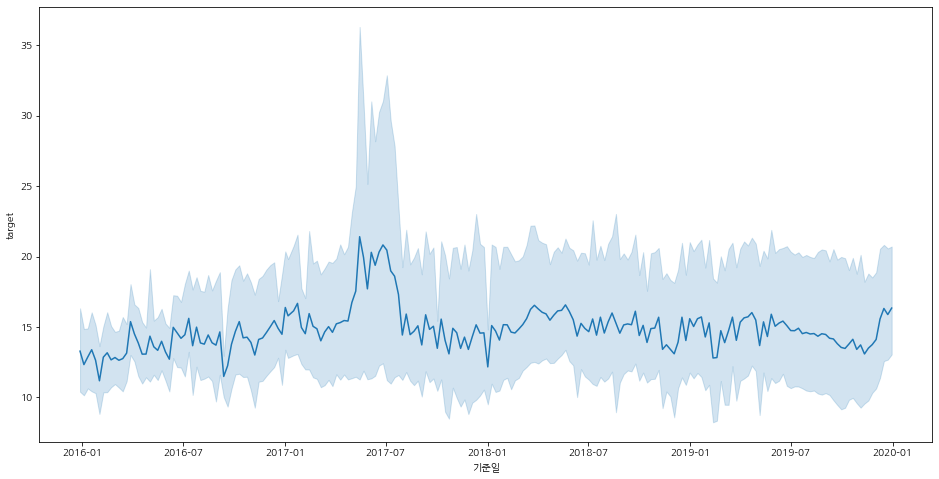

In [9]:
# 2017년 몇개의 데이터를 제외하고 큰 이상치가 나타나진 않는다.
plt.figure(figsize = (16,8))
sns.lineplot(data = df, x = '기준일', y = 'target')

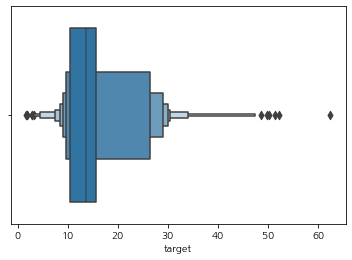

In [10]:
# 이상치도 많이 존재 하는 것으로 보인다.
sns.boxenplot(df['target'])

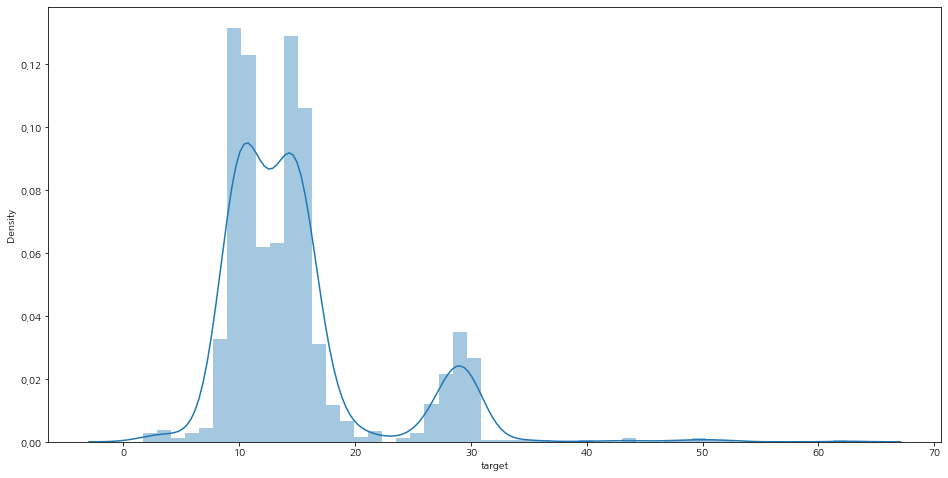

In [11]:
# 분포가 쌍곡분포를 따른다.
plt.figure(figsize = (16,8))
sns.distplot(df['target'])

In [12]:
# 이상치 제거를 IQR 방법을 통해서 제거해 보도록 하자.
def get_outlier(df=None, column=None, weight=4.0):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

delete_index = get_outlier(df = df, column = 'target', weight = 4.5)
print(delete_index)
df_iqr = df.drop(delete_index, axis = 0)

Int64Index([14240, 14444, 14639, 14834, 15054, 15244, 15449, 15663, 15859,
            16051],
           dtype='int64')


In [13]:
# 노르웨이의 가격 인상으로 인해서 이상치가 생겨났다.
# 대부분의 데이터가 2017년의 데이터라는 걸 확인할 수 있다.
df.loc[delete_index,:]

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
14240,2017-05-15,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",62.457202,5,2017,15
14444,2017-05-22,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",49.777500,5,2017,22
14639,2017-05-29,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",40.521693,5,2017,29
14834,2017-06-05,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",51.394008,6,2017,5
15054,2017-06-12,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",43.791678,6,2017,12
15244,2017-06-19,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",48.550884,6,2017,19
15449,2017-06-26,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",43.481666,6,2017,26
15663,2017-07-03,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",50.173407,7,2017,3
15859,2017-07-10,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",52.263797,7,2017,10
16051,2017-07-17,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",47.185995,7,2017,17


Text(0.5, 1.0, '이상치 제거를 안했을 때 lineplot')

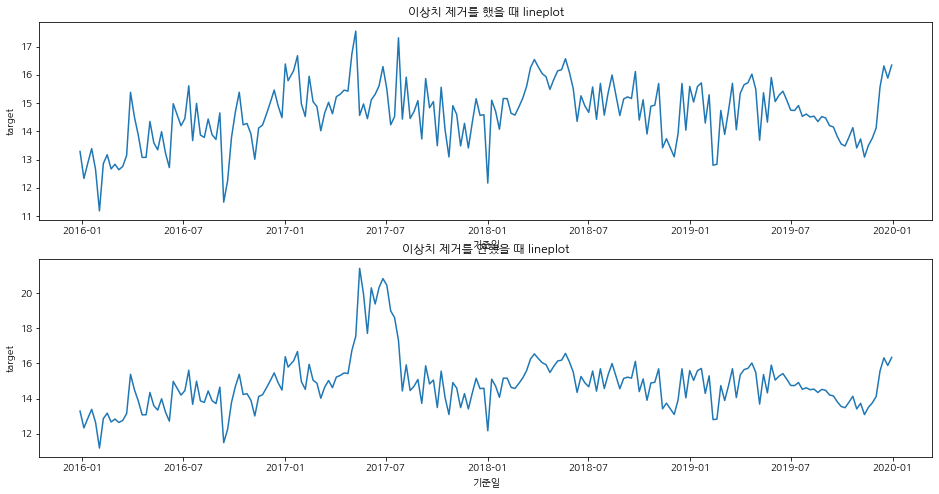

In [14]:
# 이상치 제거를 했을 때와 안했을 때 차이가 있는지 확인해 보자.
plot_data = df_iqr[['기준일','target']].groupby('기준일').mean().reset_index()
plot_data1 = df[['기준일', 'target']].groupby('기준일').mean().reset_index()
plot_data

fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.lineplot(data = plot_data, x = '기준일', y = 'target', ax = ax[0])
sns.lineplot(data = plot_data1, x = '기준일', y = 'target', ax = ax[1])
ax[0].set_title('이상치 제거를 했을 때 lineplot')
ax[1].set_title('이상치 제거를 안했을 때 lineplot')

Text(0.5, 1.0, '이상치를 제거 안했을 때 boxenplot')

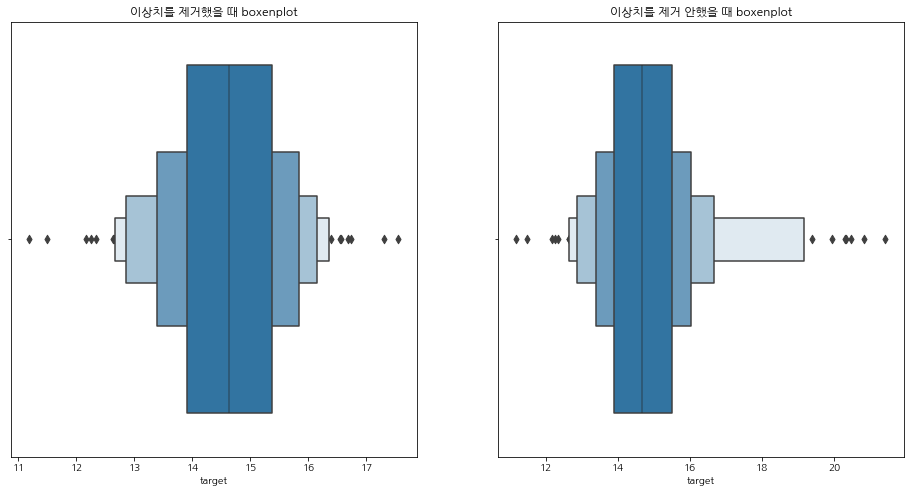

In [15]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.boxenplot(plot_data['target'], ax = ax[0])
sns.boxenplot(plot_data1['target'], ax = ax[1])
ax[0].set_title('이상치를 제거했을 때 boxenplot')
ax[1].set_title('이상치를 제거 안했을 때 boxenplot')

Text(0.5, 1.0, '이상치를 제거 안했을 때 distplot')

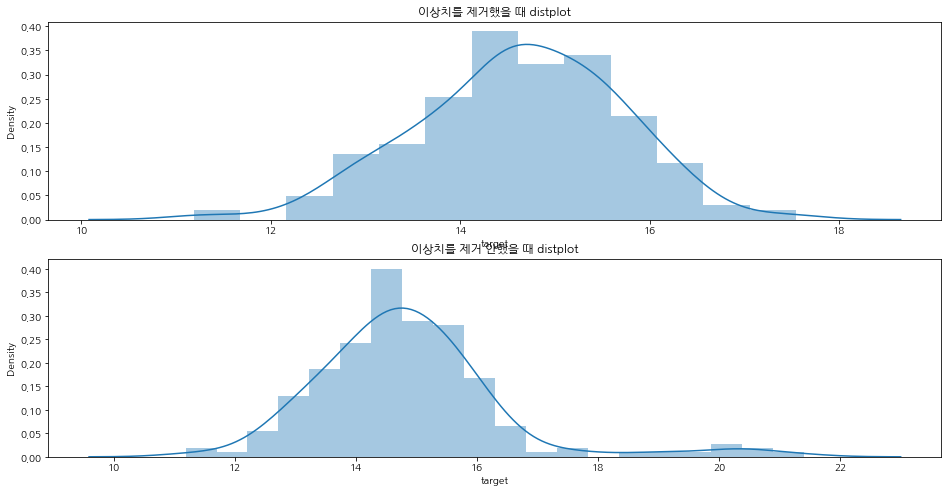

In [16]:
# 이상치를 제거했을 때와 제거를 안했을 때를 비교해보자.
fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.distplot(plot_data['target'], ax = ax[0])
sns.distplot(plot_data1['target'], ax = ax[1])
ax[0].set_title('이상치를 제거했을 때 distplot')
ax[1].set_title('이상치를 제거 안했을 때 distplot')

In [17]:
# 위의 그래프를 보면 이상치를 제거했을 때 log를 정규성이 되지 않을까?
from scipy.stats import shapiro
alpha = 0.05

# 이상치를 제거했을 때 정규성을 띄는 것을 볼 수 있다.
# p_value > 0.05임으로 정규성을 만족한다.
stats, p = shapiro(plot_data['target'])
print('이상치 제거 데이터 :',stats, p)

# 이상치를 제거하고 log를 씌웠을 때 정규성을 만족하지 않는다.
stats, p = shapiro(plot_data['target'].apply(lambda x:np.log1p(x)))
print('이상치 제거 데이터 + log :', stats, p)

# 이상치를 제거하지 않았을 때 정규성을 만족하지 않는다.
stats, p = shapiro(plot_data1['target'])
print('이상치 제거하지 않았을 때 :', stats, p)

# 이상치를 제거하지 않았을 때 정규성을 만족하지 않는다.
stats, p = shapiro(plot_data1['target'].apply(lambda x:np.log1p(x)))
print('이상치 제거하지 않았을 때 + log:', stats, p)

이상치 제거 데이터 : 0.9936328530311584 0.508177638053894
이상치 제거 데이터 + log : 0.9848570227622986 0.023973388597369194
이상치 제거하지 않았을 때 : 0.8905965685844421 3.096723572015847e-11
이상치 제거하지 않았을 때 + log: 0.9343797564506531 4.1611492918036674e-08


정규성을 만족하는 것은 이상치를 제거하면 만족한다.

# Modeling

In [18]:
df_iqr

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
74,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815,12,2015,28
129,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755,12,2015,28
168,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384,12,2015,28
174,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826,12,2015,28
198,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.844281,12,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41994,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",16.495971,12,2019,30
41995,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",18.350634,12,2019,30
42044,2019-12-30,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,냉장,11.128269,12,2019,30
42056,2019-12-30,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",15.631531,12,2019,30


In [19]:
# data = df_iqr.copy()
# data['수입용도'] = data['수입용도'].map({'판매용':2, '자사제품제조용':1, '외화획득용 원료':0})
data = pd.get_dummies(df_iqr, columns = ['제조국','수입용도','수입형태','month']).drop(['제품구분','수출국','어종','상세어종','중분류명 카테고리','year','day'], axis = 1)
train = data[data['기준일'] < '2019']
val = data[data['기준일'] > '2019']
train = train.groupby('기준일').mean().reset_index(drop = True)
val = val.groupby('기준일').mean().reset_index(drop = True)

In [20]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 45 kB/s 


In [21]:
# 모든 모델을 돌려서 rmse를 측정해 보자.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X_train, y_train = train.drop('target', axis = 1), train['target']
X_val, y_val = val.drop('target', axis = 1), val['target']

models = {'lightgbm':LGBMRegressor(random_state = 42), 'xgboost':XGBRegressor(random_state = 42),'catboost': CatBoostRegressor(random_state = 42),'lr': LinearRegression(),'ridge': Ridge(random_state = 42),'lasso': Lasso(),'rfg':RandomForestRegressor(),'gb':GradientBoostingRegressor()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  RMSE = mean_squared_error(y_val, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[15:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.028104
0:	learn: 1.1161374	total: 46.3ms	remaining: 46.3s
1:	learn: 1.1083717	total: 47.1ms	remaining: 23.5s
2:	learn: 1.1015629	total: 47.8ms	remaining: 15.9s
3:	learn: 1.0946315	total: 48.5ms	remaining: 12.1s
4:	learn: 1.0880552	total: 49.1ms	remaining: 9.78s
5:	learn: 1.0813566	total: 49.8ms	remaining: 8.25s
6:	learn: 1.0739335	total: 50.4ms	remaining: 7.15s
7:	learn: 1.0682286	total: 51.1ms	remaining: 6.34s
8:	learn: 1.0623775	total: 51.9ms	remaining: 5.71s
9:	learn: 1.0579010	total: 52.4ms	remaining: 5.18s
10:	learn: 1.0519522	total: 53ms	remaining: 4.76s
11:	learn: 1.0472254	total: 53.6ms	remaining: 4.42s
12:	learn: 1.0413715	total: 54.2ms	remaining: 4.12s
13:	learn: 1.0358387	total: 54.9ms	remaining: 3.87s
14:	learn: 1.0310016	total: 55.5ms	remaining: 3.65s
15:	learn: 1.0263450	total: 56.9ms	remaining: 3.5s
16:	learn: 1.0222460	tot

In [22]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19878 sha256=0dce2c57192dc3b95eeb7a0236c4c35fe0bc9134008e98688ce3129b6c2c14dc
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [23]:
from vecstack import stacking

def rmse(y, y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

lgb = LGBMRegressor(random_state =42)
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
catboost = CatBoostRegressor(random_state =42, task_type = 'GPU')
rfg = RandomForestRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lr = LinearRegression()
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)

models = [lgb,xgb, catboost, ridge, rfg,lr, gb, lasso]

S_train, S_test = stacking(models, X_train, y_train, X_val, regression = True, mode = 'oof_pred_bag', metric  = rmse, n_folds =3, random_state = 42)

lgb = LinearRegression()
lgb.fit(S_train, y_train)
y_pred = lgb.predict(S_test)
RMSE = rmse(y_val, y_pred)

print(RMSE)

[15:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.059889
0:	learn: 0.9095113	total: 9.47ms	remaining: 9.46s
1:	learn: 0.8928452	total: 17.9ms	remaining: 8.93s
2:	learn: 0.8729518	total: 26.3ms	remaining: 8.75s
3:	learn: 0.8617511	total: 34.7ms	remaining: 8.64s
4:	learn: 0.8494866	total: 41.4ms	remaining: 8.23s
5:	learn: 0.8406823	total: 47.8ms	remaining: 7.92s
6:	learn: 0.8247162	total: 56.3ms	remaining: 7.99s
7:	learn: 0.8183002	total: 64.8ms	remaining: 8.04s
8:	learn: 0.8054620	total: 73.1ms	remaining: 8.04s
9:	learn: 0.7942398	total: 85.8ms	remaining: 8.49s
10:	learn: 0.7845230	total: 94.2ms	remaining: 8.46s
11:	learn: 0.7781620	total:

In [24]:
from sklearn.ensemble import VotingRegressor

lr = LinearRegression()
lgb = LGBMRegressor(random_state = 42)
cat = CatBoostRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
rfg = RandomForestRegressor(random_state = 42)
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)


vo_reg = VotingRegressor(estimators = [('lr',lr),('lgb',lgb),('cat',cat),('xgb',xgb),('ridge',ridge),('rfg',rfg),('gb',gb),('lasso',lasso)], n_jobs = 3)
vo_reg.fit(X_train, y_train)
y_pred = vo_reg.predict(X_val)

RMSE = rmse(y_val, y_pred)

print(RMSE)

0.7461711248801277


In [25]:
import statsmodels.api as sm

X = sm.add_constant(train.drop('target', axis = 1))
y = train['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     3.561
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           3.96e-07
Time:                        15:37:55   Log-Likelihood:                -195.81
No. Observations:                 158   AIC:                             451.6
Df Residuals:                     128   BIC:                             543.5
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.4796 

[15:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Text(0.5, 0, 'Xgboost Feature Importance')

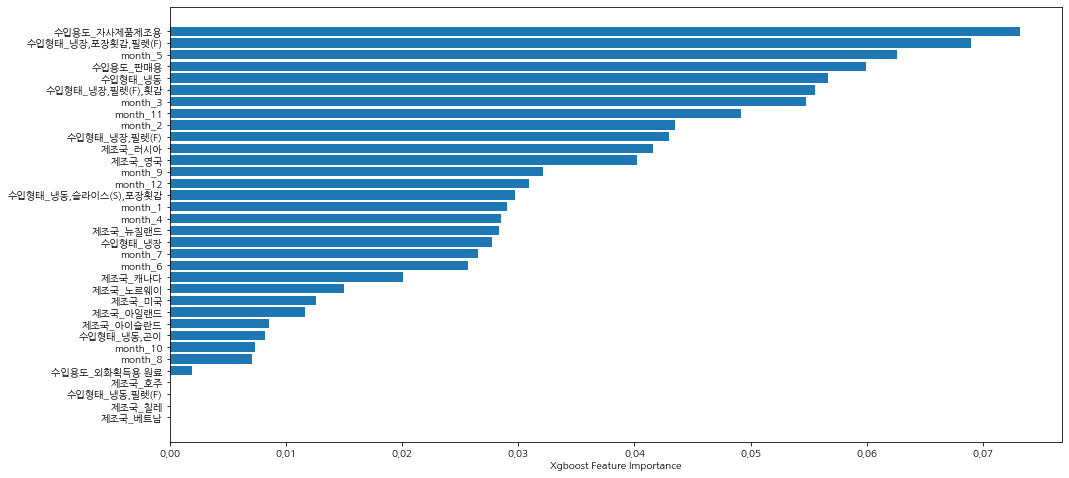

In [26]:
# XGB importance
model = XGBRegressor(random_state =42)
model.fit(train.drop('target', axis = 1), train['target'])

sorted_idx = model.feature_importances_.argsort()

plt.figure(figsize = (16,8))
plt.barh(train.drop('target', axis = 1).columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel('Xgboost Feature Importance')

In [27]:
# 다중 공선성을 확인하려고 했지만 inf만 나오게 된다.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train.drop('target', axis = 1).values, i) for i in range(train.drop('target',axis = 1).shape[1])]
vif['features'] = train.drop('target',axis =1).columns
vif

,VIF Factor,features
0,inf,제조국_노르웨이
1,inf,제조국_뉴질랜드
2,inf,제조국_러시아
3,inf,제조국_미국
4,inf,제조국_베트남
5,inf,제조국_아이슬란드
6,inf,제조국_아일랜드
7,inf,제조국_영국
8,inf,제조국_칠레
9,inf,제조국_캐나다


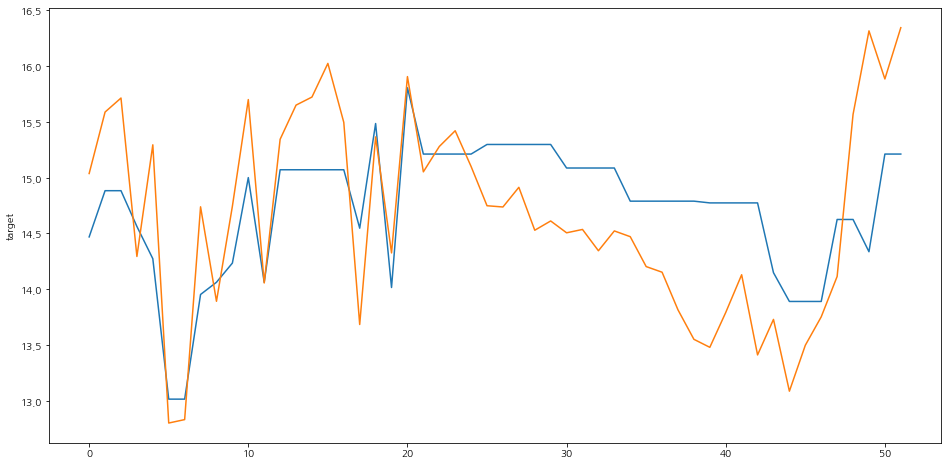

In [28]:
# 가장 잘 나온 linear regression을 살펴보자.
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred = pd.DataFrame(y_pred, columns = ['target'])
y_val = pd.DataFrame(y_val, columns = ['target'])
plt.figure(figsize = (16,8))
sns.lineplot(data = y_pred,x = y_pred.index, y = 'target',palette= 'Blues')
sns.lineplot(data = y_val, x = y_val.index, y = 'target',palette = 'cubehelix', markers= 'o')
plt.show()


# 이상치 제거 이후

In [29]:
df.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
74,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815,12,2015,28
129,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755,12,2015,28
168,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384,12,2015,28
174,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826,12,2015,28
198,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.844281,12,2015,28


Text(0.5, 1.0, '수입용도 count')

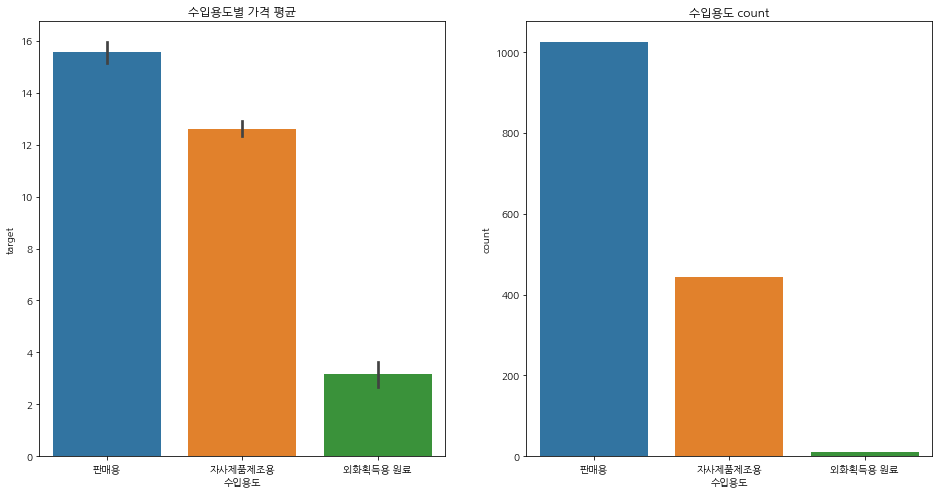

In [30]:
# 이상치를 제거하기 전과 똑같이 분포가 그려지게 된다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = df_iqr, x = '수입용도', y = 'target', ax = ax[0])
sns.countplot(df_iqr['수입용도'], ax = ax[1])
ax[0].set_title('수입용도별 가격 평균')
ax[1].set_title('수입용도 count')

Text(0.5, 1.0, '제조국별 countplot')

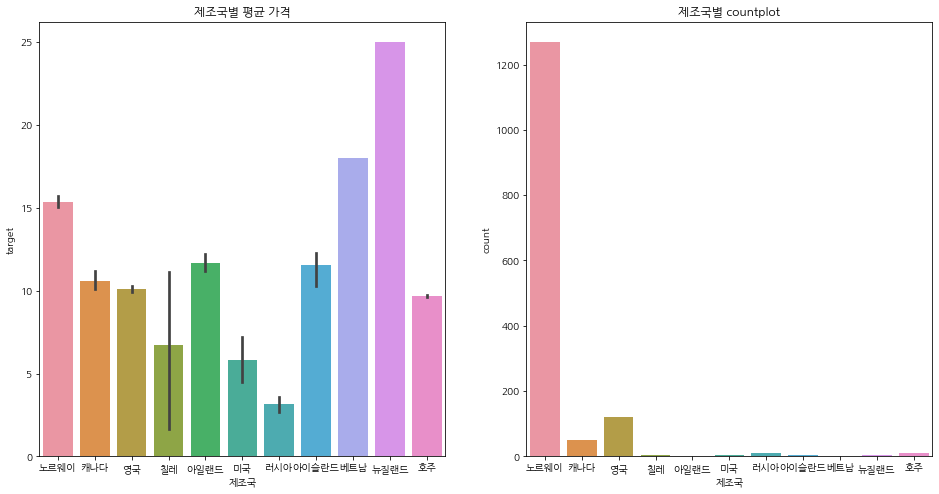

In [31]:
# 가격은 뉴질랜드와 베트남이 높다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = df_iqr, x = '제조국', y = 'target', ax = ax[0])
sns.countplot(df_iqr['제조국'], ax = ax[1])
ax[0].set_title('제조국별 평균 가격')
ax[1].set_title('제조국별 countplot')

In [32]:
# 베트남은 1곳 뉴질랜드는 3곳이 있다.
df_iqr[(df_iqr['제조국'] == '뉴질랜드') | (df_iqr['제조국'] == '베트남')]

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
24853,2018-05-14,수산물,베트남,베트남,판매용,어류,연어,연어,"냉동,슬라이스(S),포장횟감",18.0,5,2018,14
26846,2018-07-23,수산물,뉴질랜드,뉴질랜드,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",25.0,7,2018,23
27413,2018-08-13,수산물,뉴질랜드,뉴질랜드,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",25.0,8,2018,13
31110,2018-12-17,수산물,뉴질랜드,뉴질랜드,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",25.0,12,2018,17


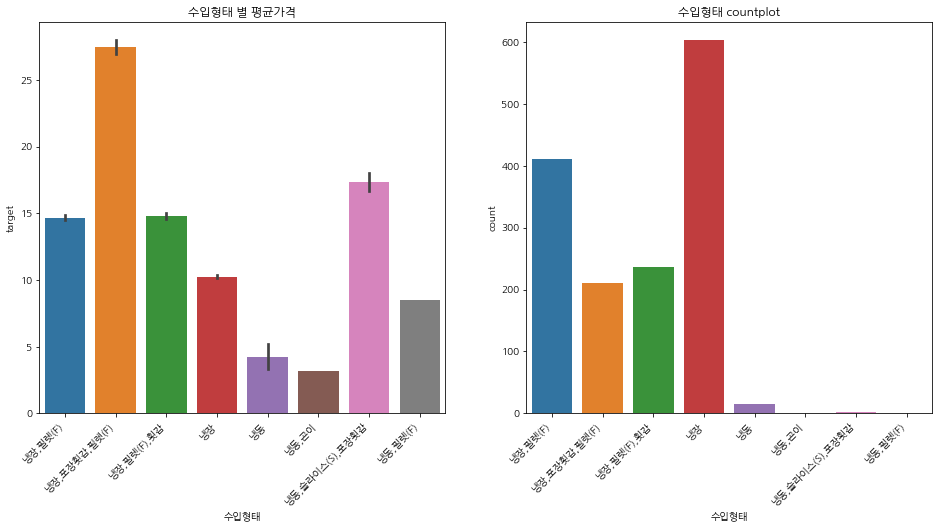

In [33]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = df_iqr, x = '수입형태', y = 'target', ax = ax[0])
sns.countplot(df_iqr['수입형태'], ax = ax[1])
ax[0].set_title('수입형태 별 평균가격')
ax[1].set_title('수입형태 countplot')
fig.autofmt_xdate(rotation=45)

- 냉장, 냉장,필렛(F), 냉장,포장횟감,필렛(F), 냉장,필렛(F),횟감, other 이렇게 5가지로 범주화 해서 데이터 분석을 진행하면 어떨까?

In [34]:
# 연어같은 경우에 노르웨이의 가격은 연어의 표준 지표로 사용되고 있다.
# 그러면 다른 변수를 배제하고 분석을 진행한다면 더 좋은 예측이 되지 않을까?

In [35]:
df_iqr['수입용도'].unique()

array(['판매용', '자사제품제조용', '외화획득용 원료'], dtype=object)

In [36]:
print('판매용 :', df_iqr[df_iqr['수입용도'] == '판매용']['수입형태'].unique())
print('자사제품제조용 :', df_iqr[df_iqr['수입용도'] == '자사제품제조용']['수입형태'].unique())
print('외화획득용 원료 :', df_iqr[df_iqr['수입용도'] == '외화획득용 원료']['수입형태'].unique())

판매용 : ['냉장,필렛(F)' '냉장,포장횟감,필렛(F)' '냉장,필렛(F),횟감' '냉장' '냉동' '냉동,곤이'
 '냉동,슬라이스(S),포장횟감' '냉동,필렛(F)']
자사제품제조용 : ['냉장,필렛(F)' '냉장' '냉장,필렛(F),횟감']
외화획득용 원료 : ['냉동']


Text(0.5, 1.0, '수입용도별 lineplot')

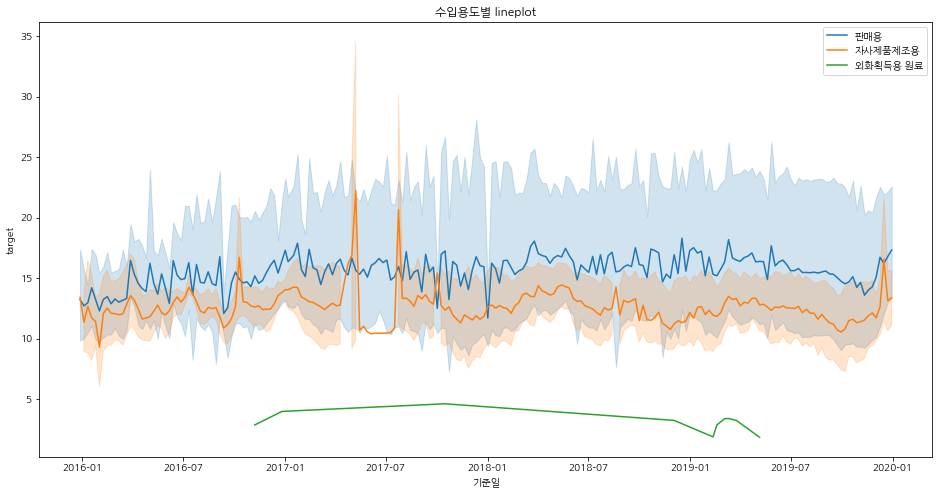

In [38]:
# 수입용도별 lineplot
plt.figure(figsize = (16,8))
for i in df_iqr['수입용도'].unique():
  sns.lineplot(data = df_iqr[df_iqr['수입용도'] == i], x = '기준일', y = 'target')
plt.legend(labels=[i for i in df_iqr['수입용도'].unique()])
plt.title('수입용도별 lineplot')

Text(0.5, 1.0, '수입형태별 lineplot')

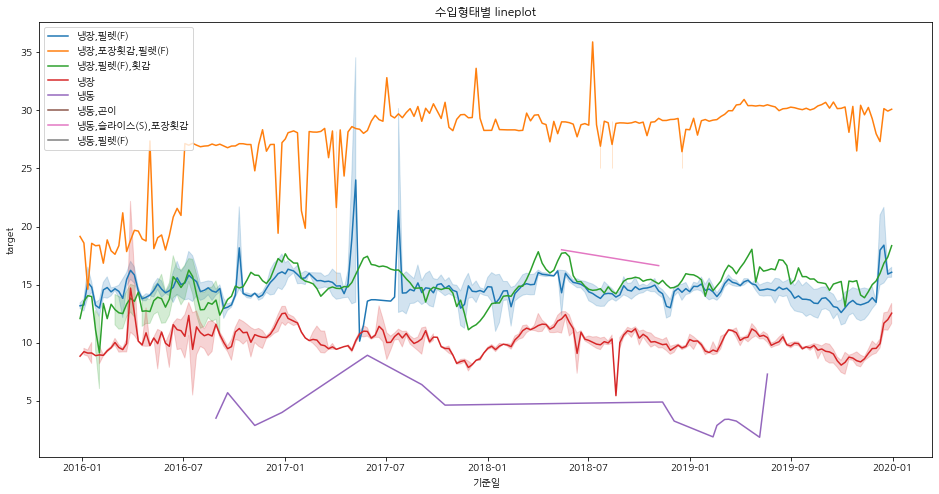

In [39]:
# 수입형태별 lineplot
plt.figure(figsize = (16,8))
for i in df_iqr['수입형태'].unique():
  sns.lineplot(data = df_iqr[df_iqr['수입형태'] == i], x = '기준일', y = 'target')
plt.legend(labels=[i for i in df_iqr['수입형태'].unique()])
plt.title('수입형태별 lineplot')

# 수산물 가격 지수 확인해보기

- rmse가 높게 나오는 경향이 있고 상관관계도 안 좋기 때문에 폐기한다.

In [40]:
# seafood_df = pd.read_csv('/content/drive/MyDrive/빅콘테스트/수산물 2015년지수.csv', encoding = 'cp949')

In [41]:
# seafood_df = seafood_df[(seafood_df['계정항목코드별'] == '수산물') & (seafood_df['통화계약구분코드별'] == '계약통화기준')].drop(['항목','단위','계정항목코드별','통화계약구분코드별'], axis = 1).T

In [42]:
# seafood_df.index = [i.replace('월','') for i in seafood_df.index]
# seafood_df.index = [i.replace(' ','') for i in seafood_df.index]
# seafood_df.index = [i.replace('.', '-') for i in seafood_df.index]
# seafood_df = seafood_df.rename(columns = {58: '수산물지수'}).reset_index().drop(49, axis = 0)

In [43]:
# df_iqr['기준일'] = df_iqr['기준일'].astype('str')
# df_iqr['year_month'] = df_iqr['기준일'].apply(lambda x: x[:7])

In [44]:
# seafood_df = seafood_df.rename(columns = {'index':'year_month'})
# df_iqr = pd.merge(df_iqr, seafood_df, how = 'left', on = 'year_month')

연어 가격과 유가, 환율(https://m.mt.co.kr/renew/view.html?no=2016011409262065338&googleamp)

# 다른방식으로 모델링 진행하기

In [45]:
# 연어 데이터에서 관측된 고유한 수입형태
연어_수입형태 = set()

for index in df_iqr.index:
    value_list = df_iqr.loc[index, '수입형태'].split(',')

    연어_수입형태.update(value_list)

# 고유한 수입형태에 모두 0 넣어주기
df_iqr[list(연어_수입형태)] = 0

for index in df_iqr.index:

    value_list = df_iqr.loc[index, '수입형태'].split(',')

    for value in value_list:
        df_iqr.loc[index, value] = 1

In [46]:
# df_iqr : 연어데이터 추출한거임
df_iqr = df_iqr[df_iqr['어종'] == '연어'].reset_index(drop = True)

In [47]:
df_iqr.columns

Index(['기준일', '제품구분', '제조국', '수출국', '수입용도', '중분류명 카테고리', '어종', '상세어종', '수입형태',
       'target', 'month', 'year', 'day', '곤이', '냉장', '필렛(F)', '슬라이스(S)', '횟감',
       '포장횟감', '냉동'],
      dtype='object')

In [48]:
# df_수입형태에 수입형태의 count를 해놓는다.
df_수입형태 = df_iqr[['기준일','슬라이스(S)','냉장', '필렛(F)', '냉동', '포장횟감', '곤이', '횟감']].groupby('기준일').mean().reset_index()

In [49]:
df_수입형태

,기준일,슬라이스(S),냉장,필렛(F),냉동,포장횟감,곤이,횟감
0,2015-12-28,0.0,1.0,0.800000,0.0,0.200000,0.0,0.200000
1,2016-01-04,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857
2,2016-01-11,0.0,1.0,0.666667,0.0,0.166667,0.0,0.166667
3,2016-01-18,0.0,1.0,0.666667,0.0,0.166667,0.0,0.166667
4,2016-01-25,0.0,1.0,0.833333,0.0,0.166667,0.0,0.333333
...,...,...,...,...,...,...,...,...
205,2019-12-02,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857
206,2019-12-09,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857
207,2019-12-16,0.0,1.0,0.500000,0.0,0.125000,0.0,0.125000
208,2019-12-23,0.0,1.0,0.500000,0.0,0.125000,0.0,0.125000


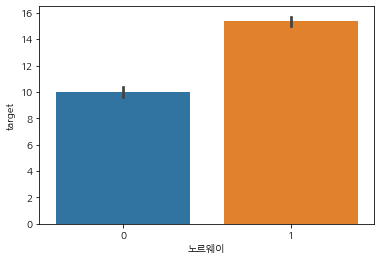

In [50]:
df_iqr['노르웨이'] = df_iqr['제조국'].apply(lambda x:1 if x == '노르웨이' else 0)
sns.barplot(data = df_iqr, x = '노르웨이', y = 'target')

In [52]:
# 수입용도 더미화, 수입형태 나눠서 count, 제조국 노르웨이 :1 나머지 :0 그러면 이걸 더미화를 진행해서 count?
data = df_iqr.drop(['제품구분','수출국','중분류명 카테고리','어종','상세어종','year','day','수입형태'], axis = 1)

In [53]:
data = pd.get_dummies(data = data, columns = ['제조국','수입용도','month'])

In [54]:
data.columns

Index(['기준일', 'target', '곤이', '냉장', '필렛(F)', '슬라이스(S)', '횟감', '포장횟감', '냉동',
       '노르웨이', '제조국_노르웨이', '제조국_뉴질랜드', '제조국_러시아', '제조국_미국', '제조국_베트남',
       '제조국_아이슬란드', '제조국_아일랜드', '제조국_영국', '제조국_칠레', '제조국_캐나다', '제조국_호주',
       '수입용도_외화획득용 원료', '수입용도_자사제품제조용', '수입용도_판매용', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [55]:
final_data = data.groupby('기준일').mean().reset_index()[['기준일','target','수입용도_외화획득용 원료','수입용도_자사제품제조용','수입용도_판매용','노르웨이']]

In [56]:
final_data.head()

,기준일,target,수입용도_외화획득용 원료,수입용도_자사제품제조용,수입용도_판매용,노르웨이
0,2015-12-28,13.287212,0.0,0.200000,0.800000,1.000000
1,2016-01-04,12.331994,0.0,0.285714,0.714286,0.857143
2,2016-01-11,12.876513,0.0,0.333333,0.666667,1.000000
3,2016-01-18,13.387350,0.0,0.333333,0.666667,1.000000
4,2016-01-25,12.644323,0.0,0.333333,0.666667,1.000000


In [57]:
final_data = pd.merge(final_data, df_수입형태, how = 'left', on = '기준일')

In [58]:
import statsmodels.api as sm

X = sm.add_constant(final_data.drop(['target','기준일'], axis = 1))
y = final_data['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     9.426
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           6.41e-12
Time:                        15:39:09   Log-Likelihood:                -275.20
No. Observations:                 210   AIC:                             570.4
Df Residuals:                     200   BIC:                             603.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9981      0.563      8.884

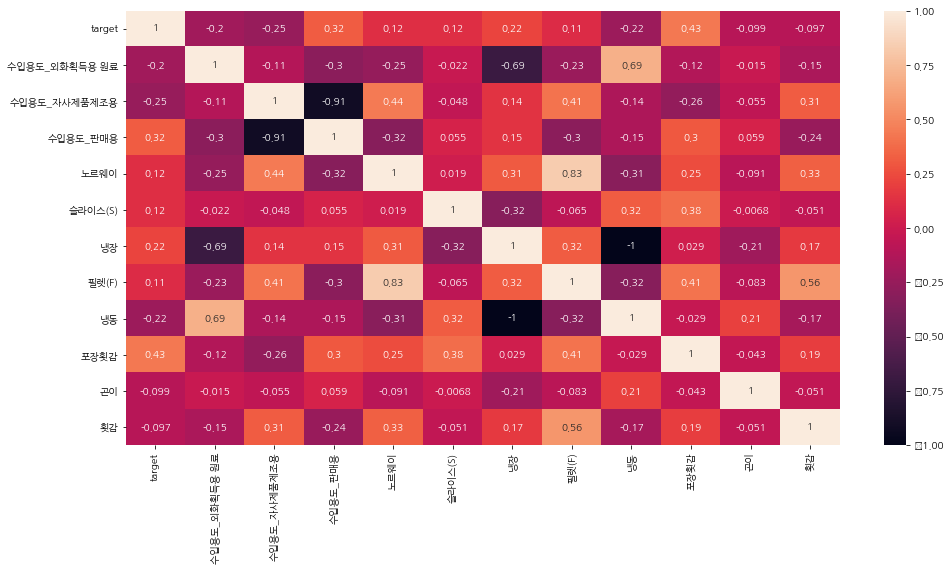

In [59]:
plt.figure(figsize = (16,8))
sns.heatmap(final_data.corr(), annot = True)

In [60]:
train = final_data[final_data['기준일'] < '2019'].drop('기준일', axis = 1)
val = final_data[final_data['기준일'] > '2019'].drop('기준일', axis = 1)

In [61]:
# 모든 모델을 돌려서 rmse를 측정해 보자.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X_train, y_train = train.drop('target', axis = 1), train['target']
X_val, y_val = val.drop('target', axis = 1), val['target']

models = {'lightgbm':LGBMRegressor(random_state = 42), 'xgboost':XGBRegressor(random_state = 42),'catboost': CatBoostRegressor(random_state = 42),'lr': LinearRegression(),'ridge': Ridge(random_state = 42),'lasso': Lasso(),'rfg':RandomForestRegressor(),'gb':GradientBoostingRegressor()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  RMSE = mean_squared_error(y_val, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[15:39:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.028104
0:	learn: 1.1168814	total: 419us	remaining: 419ms
1:	learn: 1.1096972	total: 928us	remaining: 463ms
2:	learn: 1.1027752	total: 1.41ms	remaining: 470ms
3:	learn: 1.0953486	total: 1.88ms	remaining: 469ms
4:	learn: 1.0898294	total: 2.29ms	remaining: 455ms
5:	learn: 1.0828933	total: 2.69ms	remaining: 446ms
6:	learn: 1.0762287	total: 3.15ms	remaining: 447ms
7:	learn: 1.0699793	total: 3.63ms	remaining: 450ms
8:	learn: 1.0649155	total: 4.08ms	remaining: 450ms
9:	learn: 1.0586934	total: 4.56ms	remaining: 451ms
10:	learn: 1.0535908	total: 5.03ms	remaining: 452ms
11:	learn: 1.0480809	total: 5.5ms	remaining: 453ms
12:	learn: 1.0426916	total: 6.02ms	remaining: 457ms
13:	learn: 1.0375834	total: 6.52ms	remaining: 459ms
14:	learn: 1.0326785	total: 6.99ms	remaining: 459ms
15:	learn: 1.0277267	total: 7.46ms	remaining: 459ms
16:	learn: 1.0233545	tot

In [62]:
def rmse(y, y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

lgb = LGBMRegressor(random_state =42)
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
catboost = CatBoostRegressor(random_state =42, task_type = 'GPU')
rfg = RandomForestRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lr = LinearRegression()
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)

models = [lgb,xgb, catboost, ridge, rfg,lr, gb, lasso]

S_train, S_test = stacking(models, X_train, y_train, X_val, regression = True, mode = 'oof_pred_bag', metric  = rmse, n_folds =3, random_state = 42)

lgb = LinearRegression()
lgb.fit(S_train, y_train)
y_pred = lgb.predict(S_test)
RMSE = rmse(y_val, y_pred)

print(RMSE)

[15:39:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.059889
0:	learn: 0.9113134	total: 10.6ms	remaining: 10.6s
1:	learn: 0.8988555	total: 17ms	remaining: 8.5s
2:	learn: 0.8867823	total: 25.8ms	remaining: 8.57s
3:	learn: 0.8755743	total: 33.7ms	remaining: 8.39s
4:	learn: 0.8638352	total: 41.8ms	remaining: 8.32s
5:	learn: 0.8578150	total: 50.5ms	remaining: 8.37s
6:	learn: 0.8482219	total: 56.7ms	remaining: 8.04s
7:	learn: 0.8413053	total: 62.9ms	remaining: 7.79s
8:	learn: 0.8335041	total: 69.9ms	remaining: 7.69s
9:	learn: 0.8260343	total: 80.4ms	remaining: 7.96s
10:	learn: 0.8178603	total: 89.2ms	remaining: 8.02s
11:	learn: 0.8115535	total: 98

In [63]:
lr = LinearRegression()
lgb = LGBMRegressor(random_state = 42)
cat = CatBoostRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
rfg = RandomForestRegressor(random_state = 42)
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)


vo_reg = VotingRegressor(estimators = [('lr',lr),('lgb',lgb),('cat',cat),('xgb',xgb),('ridge',ridge),('rfg',rfg),('gb',gb),('lasso',lasso)], n_jobs = 3)
vo_reg.fit(X_train, y_train)
y_pred = vo_reg.predict(X_val)

RMSE = rmse(y_val, y_pred)

print(RMSE)

0.8280172188046597


## Clustering

In [64]:
!pip install yellowbrick

In [65]:
final_data

,기준일,target,수입용도_외화획득용 원료,수입용도_자사제품제조용,수입용도_판매용,노르웨이,슬라이스(S),냉장,필렛(F),냉동,포장횟감,곤이,횟감
0,2015-12-28,13.287212,0.0,0.200000,0.800000,1.000000,0.0,1.0,0.800000,0.0,0.200000,0.0,0.200000
1,2016-01-04,12.331994,0.0,0.285714,0.714286,0.857143,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857
2,2016-01-11,12.876513,0.0,0.333333,0.666667,1.000000,0.0,1.0,0.666667,0.0,0.166667,0.0,0.166667
3,2016-01-18,13.387350,0.0,0.333333,0.666667,1.000000,0.0,1.0,0.666667,0.0,0.166667,0.0,0.166667
4,2016-01-25,12.644323,0.0,0.333333,0.666667,1.000000,0.0,1.0,0.833333,0.0,0.166667,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2019-12-02,14.114510,0.0,0.285714,0.714286,0.857143,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857
206,2019-12-09,15.565930,0.0,0.285714,0.714286,0.857143,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857
207,2019-12-16,16.314381,0.0,0.250000,0.750000,0.750000,0.0,1.0,0.500000,0.0,0.125000,0.0,0.125000
208,2019-12-23,15.883609,0.0,0.250000,0.750000,0.750000,0.0,1.0,0.500000,0.0,0.125000,0.0,0.125000


In [66]:
final_data.columns

Index(['기준일', 'target', '수입용도_외화획득용 원료', '수입용도_자사제품제조용', '수입용도_판매용', '노르웨이',
       '슬라이스(S)', '냉장', '필렛(F)', '냉동', '포장횟감', '곤이', '횟감'],
      dtype='object')

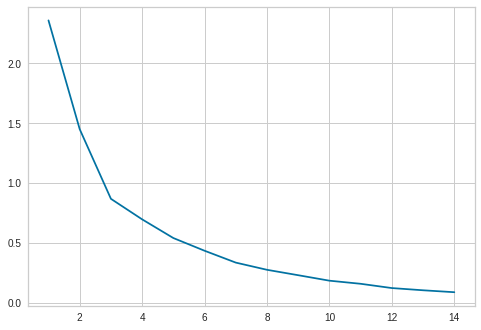

In [67]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from yellowbrick.cluster import KElbowVisualizer

sse = []
for i in range(1, 15):
  model = KMeans(n_clusters = i)

  model.fit(final_data[['슬라이스(S)', '냉장', '필렛(F)', '냉동', '포장횟감', '곤이', '횟감']])
  
  sse.append(model.inertia_)

plt.plot(range(1,15), sse)
plt.show()

In [68]:
model = KMeans(n_clusters = 3)
final_data['clustering'] = model.fit_predict(final_data[['슬라이스(S)', '냉장', '필렛(F)', '냉동', '포장횟감', '곤이', '횟감']])
final_data

,기준일,target,수입용도_외화획득용 원료,수입용도_자사제품제조용,수입용도_판매용,노르웨이,슬라이스(S),냉장,필렛(F),냉동,포장횟감,곤이,횟감,clustering
0,2015-12-28,13.287212,0.0,0.200000,0.800000,1.000000,0.0,1.0,0.800000,0.0,0.200000,0.0,0.200000,1
1,2016-01-04,12.331994,0.0,0.285714,0.714286,0.857143,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857,0
2,2016-01-11,12.876513,0.0,0.333333,0.666667,1.000000,0.0,1.0,0.666667,0.0,0.166667,0.0,0.166667,1
3,2016-01-18,13.387350,0.0,0.333333,0.666667,1.000000,0.0,1.0,0.666667,0.0,0.166667,0.0,0.166667,1
4,2016-01-25,12.644323,0.0,0.333333,0.666667,1.000000,0.0,1.0,0.833333,0.0,0.166667,0.0,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2019-12-02,14.114510,0.0,0.285714,0.714286,0.857143,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857,0
206,2019-12-09,15.565930,0.0,0.285714,0.714286,0.857143,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857,0
207,2019-12-16,16.314381,0.0,0.250000,0.750000,0.750000,0.0,1.0,0.500000,0.0,0.125000,0.0,0.125000,0
208,2019-12-23,15.883609,0.0,0.250000,0.750000,0.750000,0.0,1.0,0.500000,0.0,0.125000,0.0,0.125000,0


In [69]:
# clustering을 더미화 하지 않았을 때
X, y = sm.add_constant(final_data.drop(['기준일','target'], axis = 1)), final_data['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     8.889
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           4.95e-12
Time:                        15:39:44   Log-Likelihood:                -273.55
No. Observations:                 210   AIC:                             569.1
Df Residuals:                     199   BIC:                             605.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.2835      0.915      6.864

In [70]:
data = pd.get_dummies(data = final_data, columns = ['clustering'])

In [71]:
# clustering을 더미화 했을 때.
X, y = sm.add_constant(data.drop(['기준일','target'], axis = 1)), data['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     8.041
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           1.53e-11
Time:                        15:39:44   Log-Likelihood:                -273.55
No. Observations:                 210   AIC:                             571.1
Df Residuals:                     198   BIC:                             611.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.3721      5.693      0.944

In [72]:
from sklearn.model_selection import cross_val_predict

train = data[data['기준일'] < '2019'].drop('기준일', axis = 1)
val = data[data['기준일'] > '2019'].drop('기준일', axis = 1)

X_train, y_train = train.drop('target', axis = 1), train['target']
X_val, y_val = val.drop('target', axis = 1), val['target']

models = {'lightgbm':LGBMRegressor(random_state = 42), 'xgboost':XGBRegressor(random_state = 42),'catboost': CatBoostRegressor(random_state = 42),'lr': LinearRegression(),'ridge': Ridge(random_state = 42),'lasso': Lasso(),'rfg':RandomForestRegressor(),'gb':GradientBoostingRegressor()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  RMSE = mean_squared_error(y_val, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[15:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.028104
0:	learn: 1.1142717	total: 854us	remaining: 854ms
1:	learn: 1.1079578	total: 1.37ms	remaining: 684ms
2:	learn: 1.1000060	total: 1.84ms	remaining: 611ms
3:	learn: 1.0928015	total: 2.38ms	remaining: 592ms
4:	learn: 1.0855994	total: 2.9ms	remaining: 577ms
5:	learn: 1.0795118	total: 3.41ms	remaining: 565ms
6:	learn: 1.0731795	total: 4.05ms	remaining: 575ms
7:	learn: 1.0668103	total: 4.45ms	remaining: 552ms
8:	learn: 1.0628384	total: 4.79ms	remaining: 528ms
9:	learn: 1.0578558	total: 5.27ms	remaining: 522ms
10:	learn: 1.0531077	total: 5.76ms	remaining: 518ms
11:	learn: 1.0484765	total: 6.26ms	remaining: 516ms
12:	learn: 1.0429717	total: 6.59ms	remaining: 500ms
13:	learn: 1.0385101	total: 6.95ms	remaining: 490ms
14:	learn: 1.0338956	total: 7.42ms	remaining: 488ms
15:	learn: 1.0300713	total: 7.92ms	remaining: 487ms
16:	learn: 1.0250154	to

In [73]:
lgb = LGBMRegressor(random_state =42)
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
catboost = CatBoostRegressor(random_state =42, task_type = 'GPU')
rfg = RandomForestRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lr = LinearRegression()
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)

models = [lgb,xgb, catboost, ridge, rfg,lr, gb, lasso]

S_train, S_test = stacking(models, X_train, y_train, X_val, regression = True, mode = 'oof_pred_bag', metric  = rmse, n_folds =3, random_state = 42)

lgb = LinearRegression()
lgb.fit(S_train, y_train)
y_pred = lgb.predict(S_test)
RMSE = rmse(y_val, y_pred)

print(RMSE)

[15:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.059889
0:	learn: 0.9115166	total: 11.6ms	remaining: 11.6s
1:	learn: 0.8990732	total: 17.7ms	remaining: 8.84s
2:	learn: 0.8872372	total: 26.4ms	remaining: 8.76s
3:	learn: 0.8761623	total: 35.1ms	remaining: 8.73s
4:	learn: 0.8643006	total: 43ms	remaining: 8.56s
5:	learn: 0.8589447	total: 49.1ms	remaining: 8.13s
6:	learn: 0.8498988	total: 56.9ms	remaining: 8.06s
7:	learn: 0.8428230	total: 62.9ms	remaining: 7.8s
8:	learn: 0.8347887	total: 69.6ms	remaining: 7.66s
9:	learn: 0.8281054	total: 78ms	remaining: 7.72s
10:	learn: 0.8213265	total: 86.6ms	remaining: 7.78s
11:	learn: 0.8145864	total: 109m

In [74]:
lr = LinearRegression()
lgb = LGBMRegressor(random_state = 42)
cat = CatBoostRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
rfg = RandomForestRegressor(random_state = 42)
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)


vo_reg = VotingRegressor(estimators = [('lr',lr),('lgb',lgb),('cat',cat),('xgb',xgb),('ridge',ridge),('rfg',rfg),('gb',gb),('lasso',lasso)], n_jobs = 3)
vo_reg.fit(X_train, y_train)
y_pred = vo_reg.predict(X_val)

RMSE = rmse(y_val, y_pred)

print(RMSE)

0.8341527704124381


In [75]:
# 저번 모델보다 전부 안좋은 성능을 낸다.
# 그러면 어떠한 방식으로 모델링을 하는게 좋을까?
# 환율, 유가, 그리고 나머지 변수들에는 어떤 것들이 있을까?

In [76]:
# VIF도 inf가 많이 나오는 것을 볼 수 있다.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(data.drop(['target','기준일'], axis = 1).values, i) for i in range(data.drop(['target','기준일'],axis = 1).shape[1])]
vif['features'] = data.drop(['기준일','target'],axis =1).columns
vif

,VIF Factor,features
0,inf,수입용도_외화획득용 원료
1,inf,수입용도_자사제품제조용
2,inf,수입용도_판매용
3,4.919016,노르웨이
4,1.885009,슬라이스(S)
5,inf,냉장
6,7.206590,필렛(F)
7,inf,냉동
8,2.661708,포장횟감
9,1.139600,곤이


## 분석을 진행하면서 데이터 살펴본 결과

In [80]:
# !pip install xmltodict

관세청_관세환율정보 - https://www.data.go.kr/data/15070433/openapi.do

한국수출입 은행 - https://www.koreaexim.go.kr/site/program/financial/exchange?menuid=001001004002002

이 부분의 데이터를 살펴볼 필요가 있다.

In [79]:
# 2019년 데이터 밖에 없으니 데이터를 다시 찾아봐야 할 것 같다.
# (요청) https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?authkey=AUTHKEY1234567890&searchdate=20180102&data=AP01
# from datetime import timedelta
# from urllib.request import Request, urlopen
# from urllib.parse import urlencode, quote_plus
# import requests
# import xmltodict

# date = '2019-12-30'
# encoding_key = 'Dn0VYwuwqwTORPtc96fkXBnFjmP80MM5'
# data = 'AP01'
# for i in range(1000):
#   url = f'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?authkey={encoding_key}&searchdate={date}&data={data}'
#   req = Request(url)
#   resp_body = urlopen(req).read()
#   print(resp_body)
#   json_str = resp_body.decode("UTF-8")  #bytes to str
#   print(json_str)
#   xml_parse = xmltodict.parse(json_str) #xmlr to json dict
#   print(xml_parse)
#   json_obj = json.loads(json.dumps(xml_parse))  #convert json
#   apt = pd.json_normalize(json_obj['response']['body']['items']['item'])
#   date = pd.to_datetime(date) + timedelta(days = 1)
#   date = date.strftime('%Y%m%d')